# SALARY PREDICTION 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Windows\Downloads\Salary Data.csv")

In [3]:
df.shape

(375, 6)

In [4]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [5]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [6]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [9]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [10]:
df.duplicated().sum()

49

In [11]:
df.drop_duplicates(inplace=True)

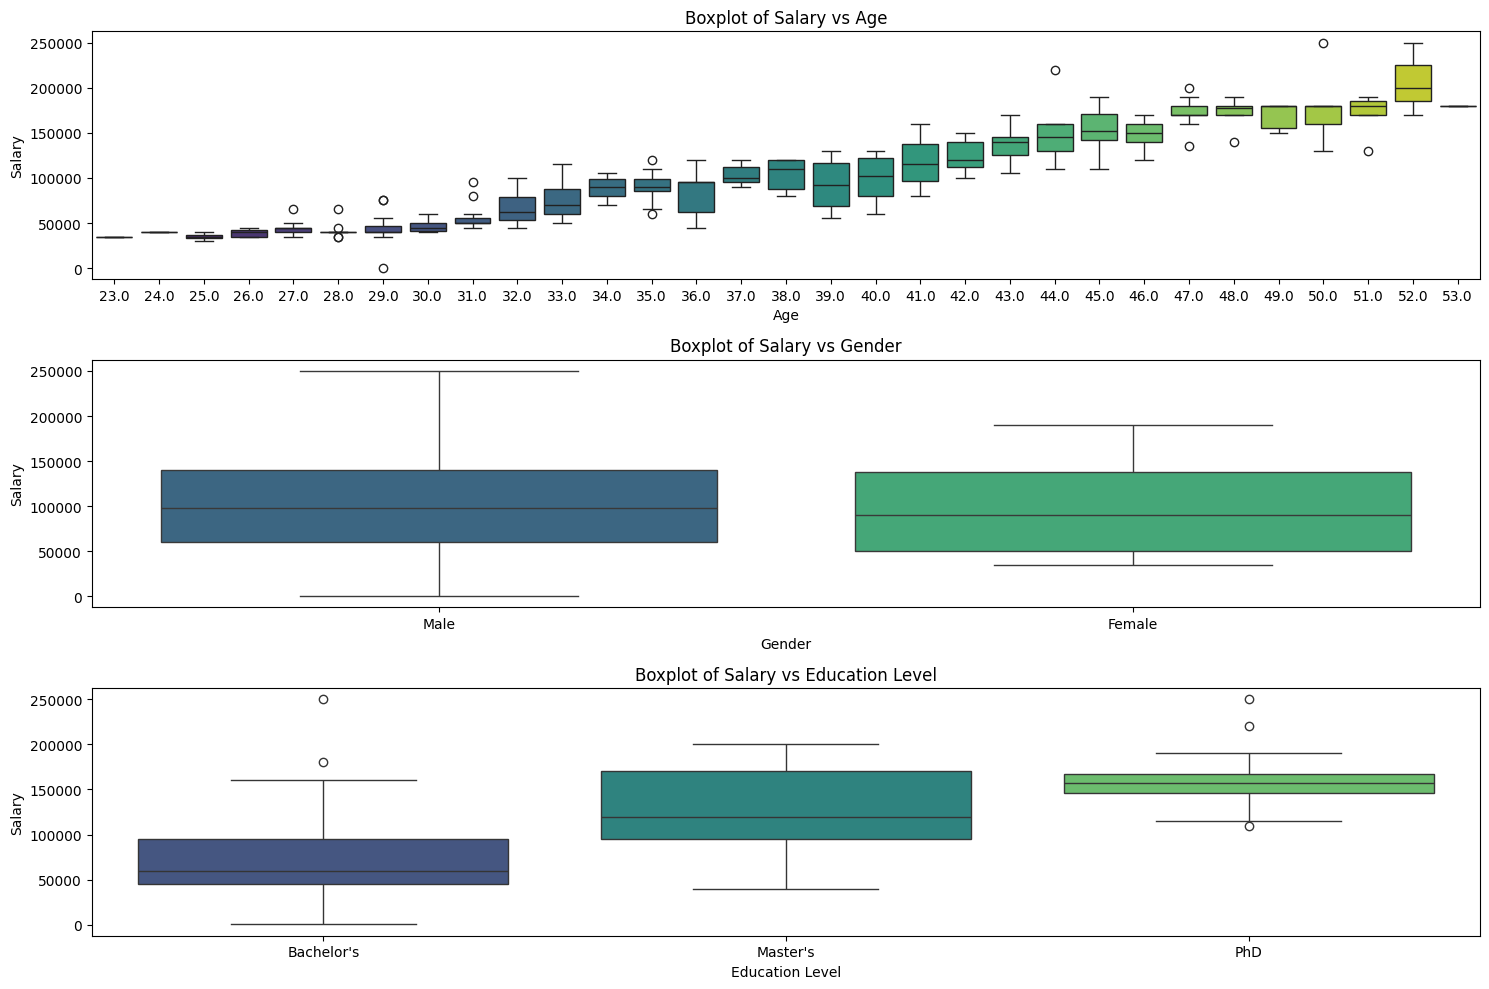

In [12]:
fig, axes = plt.subplots(3,1, figsize=(15, 10))  

# Flatten the axes array for easy indexing
axes = axes.flatten()

# List of features to create boxplots for
features = ['Age', 'Gender', 'Education Level']

# Create boxplots
for i, feature in enumerate(features):
    sns.boxplot(x=feature, y='Salary', data=df, ax=axes[i],palette='viridis')
    axes[i].set_title(f'Boxplot of Salary vs {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
df['Gender'].value_counts()

Gender
Male      170
Female    154
Name: count, dtype: int64

In [14]:
df['Education Level'].value_counts()

Education Level
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

In [15]:
df['Job Title'].value_counts()

Job Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender']) 

label_encoder_education = LabelEncoder()
df['Education Level'] = label_encoder_education.fit_transform(df['Education Level'])

In [18]:
df['Job Title'] = df['Job Title'].apply(
    lambda x: 'Director of Marketing' if x == 'Director of Marketing' else
              'Director of Operations' if x == 'Director of Operations' else
              'Others'
)

# Final encoding for Job Title
df['Job Title'] = df['Job Title'].map({
    'Director of Marketing': 0,
    'Director of Operations': 1,
    'Others': 2
})


In [19]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,2,5.0,90000.0
1,28.0,0,1,2,3.0,65000.0
2,45.0,1,2,2,15.0,150000.0
3,36.0,0,0,2,7.0,60000.0
4,52.0,1,1,2,20.0,200000.0


# Feature Selection

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('Salary', axis=1)  # Features
y = df['Salary']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scale numeric features
    ('model', RandomForestRegressor(random_state=42))  # Add regression model
])

In [23]:
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)


In [24]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print metrics
print("Model Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Model Performance Metrics:
R² Score: 0.8684
Mean Absolute Error (MAE): 10845.3900
Root Mean Squared Error (RMSE): 15772.7907


In [25]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,2,5.0,90000.0
1,28.0,0,1,2,3.0,65000.0
2,45.0,1,2,2,15.0,150000.0
3,36.0,0,0,2,7.0,60000.0
4,52.0,1,1,2,20.0,200000.0


In [26]:
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter distribution for Random Forest
param_dist = {
    'model__n_estimators': np.arange(50, 301, 50),          # Number of trees: 50 to 300
    'model__max_depth': [None] + list(np.arange(5, 31, 5)),  # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10],                  # Minimum samples to split
    'model__min_samples_leaf': [1, 2, 4]                     # Minimum samples in leaf
}

# Create the pipeline (if not already defined)
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scaling
    ('model', RandomForestRegressor(random_state=42))  # Model
])

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=100,  # Number of different combinations to try
    cv=5,        # Number of cross-validation folds
    scoring='neg_mean_absolute_error',
    n_jobs=-1,   # Use all available cores
    random_state=42,
    verbose=2     # For detailed output
)

# Fit the RandomizedSearchCV object
random_search.fit(X_train, y_train)

# Retrieve the best parameters and model
print("Best Parameters:", random_search.best_params_)
print("Best Score (Negative MAE):", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics for the best model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nPerformance of Best Model:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Best Parameters: {'model__n_estimators': 150, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 5}
Best Score (Negative MAE): -11388.524072394266

Performance of Best Model:
R² Score: 0.8729
Mean Absolute Error (MAE): 10773.9635
Root Mean Squared Error (RMSE): 15495.2791


In [27]:
import joblib


best_pipeline = random_search.best_estimator_



In [31]:
# Save the pipeline to a file
joblib.dump(best_pipeline, 'salary_prediction_pipeline.pkl')

print("Pipeline saved successfully!")


Pipeline saved successfully!


In [32]:
loaded_pipeline = joblib.load('salary_prediction_pipeline.pkl')

In [33]:
sample_input = [[30, 0, 1, 2, 5]]  # Replace with actual input format
prediction = loaded_pipeline.predict(sample_input)
print(f"Predicted Salary: {prediction[0]:.2f}")

Predicted Salary: 73306.99
